In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [2]:
# Importamos los datos utilizando pandas
datos=pd.read_csv("./data.csv")

# Creo la tabla de candidatos a mano
candidatos=pd.DataFrame(
    [
        [1,'Oscar Andrade', 'Frente Amplio'],
        [2,'Mario Bergara', 'Frente Amplio'],
        [3,'Carolina Cosse', 'Frente Amplio'],
        [4,'Daniel Martínez', 'Frente Amplio'],
        [5,'Verónica Alonso', 'Partido Nacional'],
        [6,'Enrique Antía', 'Partido Nacional'],
        [8,'Carlos Iafigliola', 'Partido Nacional'],
        [9,'Luis Lacalle Pou', 'Partido Nacional'],
        [10,'Jorge Larrañaga', 'Partido Nacional'],
        [11,'Juan Sartori', 'Partido Nacional'],
        [12,'José Amorín', 'Partido Colorado'],
        [13,'Pedro Etchegaray', 'Partido Colorado'],
        [14,'Edgardo Martínez', 'Partido Colorado'],
        [15,'Héctor Rovira', 'Partido Colorado'],
        [16,'Julio María Sanguinetti', 'Partido Colorado'],
        [17,'Ernesto Talvi', 'Partido Colorado'],
        [18,'Pablo Mieres', 'La Alternativa'],
        [19,'Gonzalo Abella', 'Unidad Popular'],        
        [20,'Edgardo Novick', 'Partido de la Gente'],
        [21,'Cèsar Vega', 'PERI'],
        [22,'Rafael Fernández', 'Partido de los Trabajadores'],
        [23,'Justin Graside', 'Partido Digital'],        
        [24,'Gustavo Salle', 'Partido Verde'],
        [25,'Carlos Techera', 'Partido de Todos']
    ],
    columns=['candidatoId','name','party'],
)

datos=datos.merge(candidatos,on=['candidatoId'])

# Sólo por si necesita, cargamos un diccionario con el texto de cada pregunta
preguntas={
    '1': 'Controlar la inflación es más importante que controlar el desempleo. ',
    '2': 'Hay que reducir la cantidad de funcionarios pùblicos',
    '3': 'Deberia aumentar la carga de impuestos para los ricos.',
    '4': 'El gobierno no debe proteger la industria nacional, si las fábricas no son competitivas esta bien que desaparezcan.',
    '5': 'La ley de inclusión financiera es positiva para la sociedad. ',
    '6': 'Algunos sindicatos tienen demasiado poder. ',
    '7': 'Cuanto más libre es el mercado, más libre es la gente. ',
    '8': 'El campo es y debe ser el motor productivo de Uruguay. ',
    '9': 'La inversión extranjera es vital para que Uruguay alcance el desarrollo. ',
    '10': 'Los supermercados abusan del pueblo con sus precios excesivos. ',
    '11': 'Con la vigilancia gubernamental (escuchas telefonicas, e-mails y camaras de seguridad) el que no tiene nada que esconder, no tiene de que preocuparse. ',
    '12': 'La pena de muerte debería ser una opción para los crímenes mas serios. ',
    '13': 'Uruguay debería aprobar más leyes anti corrupción y ser más duro con los culpables. ',
    '14': 'Las FF.AA. deberían tener un rol activo en la seguridad pública. ',
    '15': 'Las carceles deberían ser administradas por organizaciones privadas. ',
    '16': 'Hay que aumentar el salario de los policias significativamente. ',
    '17': 'Para los delitos más graves hay que bajar la edad de imputabilidad a 16 años. ',
    '18': 'Uruguay no necesita un ejército. ',
    '19': 'Uruguay es demasiado generoso con los inmigrantes. ',
    '20': 'La ley trans fue un error. ',
    '21': 'El feminismo moderno no busca la igualdad sino el poder. ',
    '22': 'Para la ley no deberia diferenciarse homicidio de femicidio. ',
    '23': 'La separación de estado y religión me parece importante. ',
    '24': 'La legalización de la marihuana fue un error. ',
    '25': 'La legalización del aborto fue un error. ',
    '26': 'El foco del próximo gobierno debe ser mejorar la educación pública. '
}

# Ordeno los datos por partido y luego por candidato

datos = datos.sort_values(by=['party','name'])

In [3]:
datos.head()

,id,candidatoId,1,2,3,4,5,6,7,8,...,20,21,22,23,24,25,26,fecha,name,party
19998,38,3,4,4,3,4,5,5,3,2,...,1,1,1,5,1,1,5,2019-02-06T16:52:06.318997,Carolina Cosse,Frente Amplio
19999,39,3,3,4,5,2,4,4,2,2,...,1,1,2,5,1,1,3,2019-02-06T17:00:09.220160,Carolina Cosse,Frente Amplio
20000,41,3,2,3,4,2,4,4,2,2,...,1,2,2,5,1,1,4,2019-02-06T17:14:33.621159,Carolina Cosse,Frente Amplio
20001,42,3,4,4,3,4,4,4,3,3,...,3,3,2,5,2,2,4,2019-02-06T17:44:43.482259,Carolina Cosse,Frente Amplio
20002,44,3,4,5,3,3,4,5,5,4,...,2,4,4,5,2,1,5,2019-02-06T18:30:28.400279,Carolina Cosse,Frente Amplio


In [4]:
party_accum_dict = {'Frente Amplio': 0, 'Partido Nacional': 0, 'Partido Colorado': 0, 'La Alternativa': 0, 'Unidad Popular': 0, 'Partido de la Gente': 0, 'PERI': 0, 'Partido de los Trabajadores': 0, 'Partido Digital': 0, 'Partido Verde': 0, 'Partido de Todos': 0}
party_color_dict = {'Frente Amplio': '#15b01a', 'Partido Nacional': '#0343df', 'Partido Colorado': '#e50000', 'La Alternativa': '#029386', 'Unidad Popular': '#f97306', 'Partido de la Gente': '#ffff15', 'PERI': '#033500', 'Partido de los Trabajadores': '#ceb301', 'Partido Digital': '#0cff0c', 'Partido Verde': '#fe01b1', 'Partido de Todos': '#0485d1'}
for key in party_accum_dict:
    party_accum_dict[key] = len(datos[datos.party == key])
sorted_accum_dict_keys = sorted(party_accum_dict)
for i in range(1, len(sorted_accum_dict_keys)):
    party_accum_dict[sorted_accum_dict_keys[i]] += party_accum_dict[sorted_accum_dict_keys[i - 1]]

## Análisis de componentes principales

In [5]:
respuestas = datos[[str(i) for i in range(1,27)]]

In [6]:
respuestas.head()

,1,2,3,4,5,6,7,8,9,10,...,17,18,19,20,21,22,23,24,25,26
19998,4,4,3,4,5,5,3,2,3,4,...,1,4,1,1,1,1,5,1,1,5
19999,3,4,5,2,4,4,2,2,4,4,...,1,5,2,1,1,2,5,1,1,3
20000,2,3,4,2,4,4,2,2,4,3,...,1,4,2,1,2,2,5,1,1,4
20001,4,4,3,4,4,4,3,3,4,4,...,4,4,2,3,3,2,5,2,2,4
20002,4,5,3,3,4,5,5,4,3,3,...,4,2,3,2,4,4,5,2,1,5


In [7]:
matriz_respuestas = np.matrix(respuestas)
matriz_respuestas = matriz_respuestas.T

Las filas de la matriz son los atributos. Las instancias están por columnas.

### Matriz de covarianza

In [8]:
valor_medio = np.mean(matriz_respuestas, axis=1)
matriz_respuestas_rescalada = matriz_respuestas - valor_medio
matriz_respuestas_rescalada

matrix([[ 0.99096989, -0.00903011, -1.00903011, ..., -0.00903011,
         -0.00903011, -2.00903011],
        [ 0.17903042,  0.17903042, -0.82096958, ..., -1.82096958,
         -0.82096958, -2.82096958],
        [-0.06903566,  1.93096434,  0.93096434, ..., -1.06903566,
          1.93096434,  1.93096434],
        ...,
        [-1.76395352, -1.76395352, -1.76395352, ...,  0.23604648,
         -1.76395352, -1.76395352],
        [-1.02129627, -1.02129627, -1.02129627, ..., -1.02129627,
         -1.02129627, -1.02129627],
        [ 0.52072611, -1.47927389, -0.47927389, ...,  0.52072611,
         -0.47927389,  0.52072611]])

In [9]:
matriz_covarianza = np.cov(matriz_respuestas_rescalada)
valores_propios, vectores_propios = np.linalg.eig(matriz_covarianza)

In [10]:
eigen_pair = [(np.abs(valores_propios[i]), vectores_propios[:,i]) for i in range(len(valores_propios))]
eigen_pair.sort()
eigen_pair.reverse()

In [11]:
matriz_w = np.hstack((eigen_pair[0][1].reshape(26,1), eigen_pair[1][1].reshape(26,1)))

In [12]:
transformed = np.dot(matriz_respuestas_rescalada.T, matriz_w).T

In [13]:
transformed

matrix([[ 4.61346392,  6.13801575,  4.9291187 , ...,  1.5707994 ,
          6.28387439,  7.38382012],
        [ 1.99152123,  0.13920137,  0.36941698, ..., -1.33457989,
         -1.68792398, -2.79407391]])

## Graficar los datos

In [14]:
xMax = np.max(transformed[0,:])
xMin = np.min(transformed[0,:])
yMax = np.max(transformed[1,:])
yMin = np.min(transformed[1,:])

Graficar los datos separando por partido

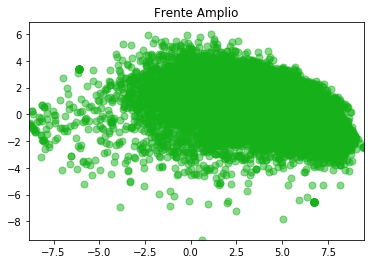

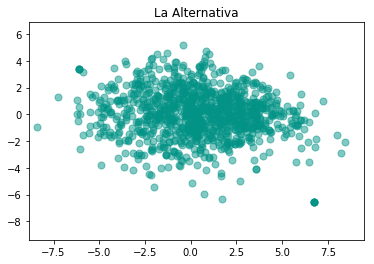

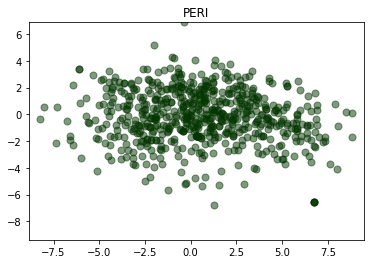

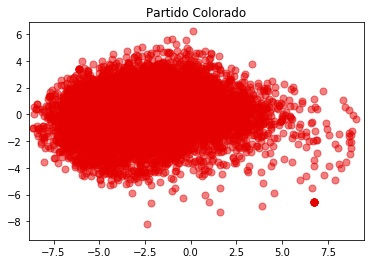

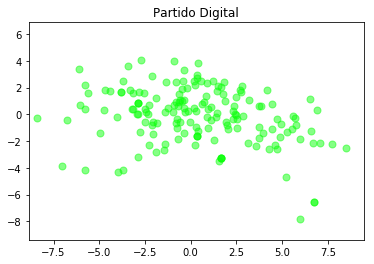

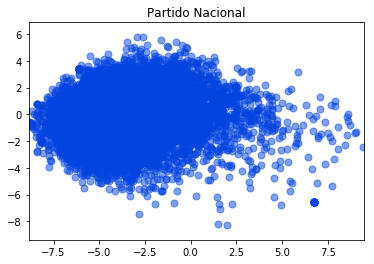

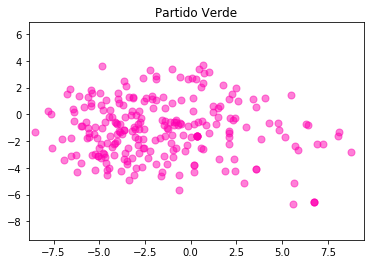

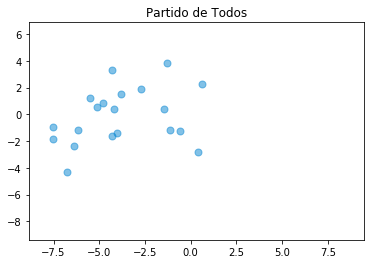

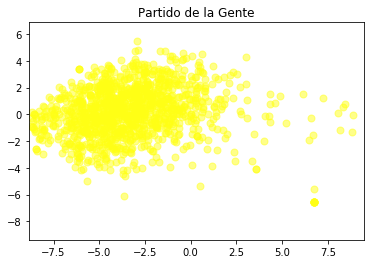

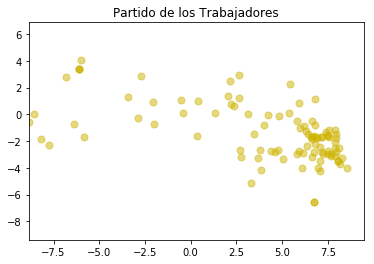

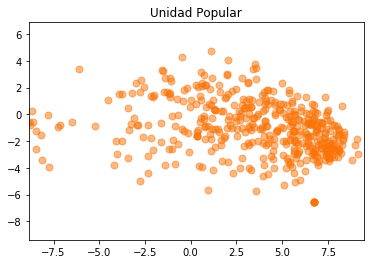

In [15]:
previous_key = None
for i in range(len(sorted_accum_dict_keys)):
    actual_key = sorted_accum_dict_keys[i]
    if previous_key is None:
        lower_bound = 0
    else:
        lower_bound = party_accum_dict[previous_key]
    upper_bound = party_accum_dict[actual_key]
    plt.figure()
    plt.plot(transformed[0,lower_bound:upper_bound], transformed[1,lower_bound:upper_bound], 'o', markersize=7, color=party_color_dict[actual_key], alpha=0.5)
    plt.title(actual_key)
    plt.xlim([xMin, xMax])
    plt.ylim([yMin, yMax])
    plt.savefig(actual_key + '.png')
    previous_key = actual_key

Graficar todos los datos juntos

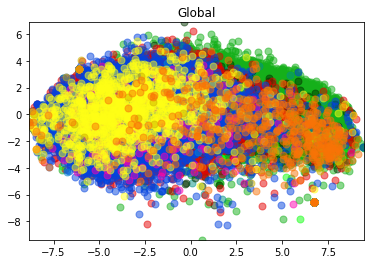

In [16]:
previous_key = None
for i in range(len(sorted_accum_dict_keys)):
    actual_key = sorted_accum_dict_keys[i]
    if previous_key is None:
        lower_bound = 0
    else:
        lower_bound = party_accum_dict[previous_key]
    upper_bound = party_accum_dict[actual_key]
    plt.plot(transformed[0,lower_bound:upper_bound], transformed[1,lower_bound:upper_bound], 'o', markersize=7, color=party_color_dict[actual_key], alpha=0.5)
    plt.title(actual_key)
    plt.xlim([xMin, xMax])
    plt.ylim([yMin, yMax])
    previous_key = actual_key
plt.title('Global')
fig = plt.gcf()
fig.savefig('Global.png')